In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.layers.embeddings import Embedding
from numpy import asarray
from numpy import zeros
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
df = pd.read_csv(r"/content/drive/MyDrive/MSc Project/Data/dataset5.csv")

In [53]:
df

,text,label
0,Four ways Bob Corker skewered Donald Trump Ima...,0
1,Linklater's war veteran comedy speaks to moder...,0
2,Trump’s Fight With Corker Jeopardizes His Legi...,0
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,0
4,Jason Aldean opens 'SNL' with Vegas tribute Co...,0
...,...,...
3983,CNN and Globalist Exposed - Steve Quayle and A...,1
3984,Trends to Watch Trends to Watch\r\n% of reader...,1
3985,Trump Jr. Is Soon To Give A 30-Minute Speech F...,1
3986,China to accept overseas trial data in bid to ...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


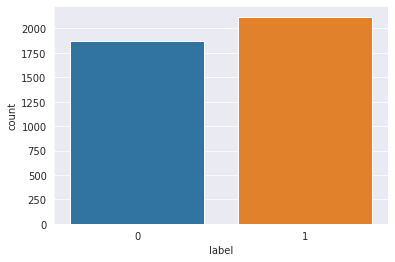

In [54]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df.label)

In [55]:
X = df['text'].to_list()
y = df['label'].to_list()

**PRE-PROCESSING OF DATA**

REMOVING URLs

In [56]:
import re

In [57]:
# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

In [58]:
X_url = [remove_url(x) for x in X]

LOWERCASING

In [59]:
X_lower = [x.lower() for x in X_url]

In [60]:
X_lower[:5]

['four ways bob corker skewered donald trump image copyright getty images\r\non sunday morning, donald trump went off on a twitter tirade against a member of his own party.\r\nthis, in itself, isn\'t exactly huge news. it\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\r\nthis time, however, his attacks were particularly biting and personal. he essentially called tennessee senator bob corker, the chair of the powerful senate foreign relations committee, a coward for not running for re-election.\r\nhe said mr corker "begged" for the president\'s endorsement, which he refused to give. he wrongly claimed that mr corker\'s support of the iranian nuclear agreement was his only political accomplishment.\r\nunlike some of his colleagues, mr corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\r\nskip twitter post by @senbobcorker it\'s a shame the white house has become an adult day care center. someone

REMOVING ALL NON-ALPHABETS

In [61]:
def cleandata(s):
    replaced = re.sub("[^a-zA-Z' ]+", '', s)
    return replaced

In [62]:
X_re = [cleandata(x) for x in X_lower]

In [63]:
len(X_re[0])

6262

STOPWORD REMOVAL

In [64]:
import nltk
from nltk.corpus import stopwords

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
stop = set(stopwords.words('english'))

In [67]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [68]:
X_stop = [remove_stopwords(x) for x in X_re]

In [69]:
len(X_stop[0])

4557

In [70]:
df = pd.DataFrame(list(zip(X_stop, y)),
               columns =['text', 'label'])

In [71]:
df.to_csv(r'/content/drive/MyDrive/MSc Project/Data/dataset5_preprocessed.csv', index=False)

In [72]:
url_saved = '/content/drive/MyDrive/MSc Project/Data/dataset5_preprocessed.csv'
df_save = pd.read_csv(url_saved)
df_save

,text,label
0,four ways bob corker skewered donald trump ima...,0
1,linklater's war veteran comedy speaks modern a...,0
2,trumps fight corker jeopardizes legislative ag...,0
3,egypt's cheiron wins tieup pemex mexican onsho...,0
4,jason aldean opens 'snl' vegas tribute country...,0
...,...,...
3983,cnn globalist exposed steve quayle alex jones ...,1
3984,trends watch trends watch readers think story ...,1
3985,trump jr soon give minute speech trump jr soon...,1
3986,china accept overseas trial data bid speed dru...,0
